## Homework 3

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

1) Newton's Method. Find the solution for

$8e^{-x} \sin(x) - 1 = 0$

Use $x_0 = 3.5$ and do it for 5 iteration. Also verify your answer(just do anything sensible).

In [15]:
xs = np.linspace(-5,5,100)

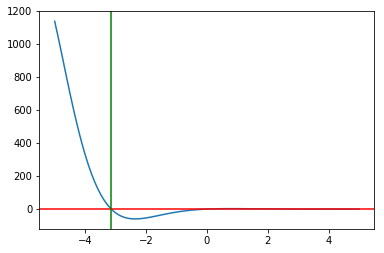

In [16]:
def f(x):
    return 8*np.exp(-x)*np.sin(x)-1

def newton(f, start, n): ## start = x0
    h = 1e-9
    x = start
    df= ((f(x+h)-f(x-h))/(h+h))
    for i in range(n):
        x = x- f(x)/df
        df= ((f(x+h)-f(x-h))/(h+h))
    return x

plt.plot(xs, [f(x) for x in xs])
plt.axhline(0, color ="red")
ans = newton(f,3.5,5)

plt.axvline(ans, color ="green")
# plt.xlim(-10,-5)


2) Back in the day before calculator has square root function. People use the "divide and average" method to calculate $\sqrt{a}$ where $a$ is a postive number. The method goes

 - Start with a number $x_0$, then the next guess for $a$ can be obtained by

$\displaystyle
x_{n+1} = \frac{x_n + a/x_n}{2}
$

 - Then you repeat and keep making the next guess.


In [17]:
def calRoot(a,x,n):
    for i in range(n):
        x = (x + (a/x))/2.
    return x

2.1) Calculate $\sqrt{17}$ using this method. Pick a sensible value for $x_0$ and do it for 5 iterations.

In [18]:
print(calRoot(17,1,5))

4.123106716962795


2.2) Show that this method is equivalent to Newton's method.

In [19]:
def f(x,a):
    return x**2-a
def newton(f, start, n,a): ## start = x0
    h = 1e-4
    x = start
    df= ((f((x+h),a)-f((x-h),a))/(h+h))
    for i in range(n):
        x = x- f(x,a)/df
        df= ((f(x+h,a)-f(x-h,a))/(h+h))
    return x

print(newton(f,1,5,17))

4.123106716962784


2.3) Find an equivalent formula for finding cube root ($\sqrt[3]{a}$)

$x_{n+1} =  H(x_n)$

Find $H(x_n)$



In [20]:
def f(x,a):
    return x**3 -a
def newton(f, start, n,a): ## start = x0
    h = 1e-4
    x = start
    df= ((f((x+h),a)-f((x-h),a))/(h+h))
    for i in range(n):
        x = x- f(x,a)/df
        df= ((f(x+h,a)-f(x-h,a))/(h+h))
    return x


2.4) Use the above method to find $\sqrt[3]{17}$

In [21]:
print(newton(f,1,5,17))

2.576347106695954


3) One of the difficulty in using Newton's method is the fact that you need to find the derivative analytically.

We can workaround that by using numerical derivative instead of analytical derivative.

Use the modified Newton's method to find solve

$\displaystyle
\frac{{xe^{\sin x}}}{(x+1)^2} = 0.1
$

Pick a sensible value for starting point and do it at least 5 iterations. Also verify that it converges to a solution.

9.29329248395


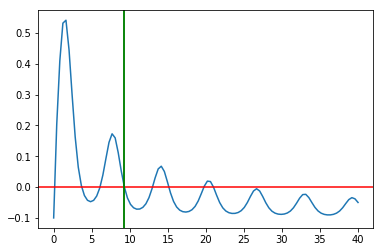

In [22]:
xs = np.linspace(0,40,100)
def f(x):
    return (x*np.exp(np.sin(x))/(x+1)**2)-0.1
def newton(f, start, n): ## start = x0
    h = 1e-4
    x = start
    df= ((f(x+h)-f(x-h))/(h+h))
    for i in range(n):
        x = x- f(x)/df
        df= ((f(x+h)-f(x-h))/(h+h))
    return x
plt.plot(xs, [f(x) for x in xs])
plt.axhline(0, color = "red")
# plt.xlim(-2,0)
# plt.ylim(1,-50)
ans = newton(f,10,5)
print(ans)
plt.axvline(ans, color = "green")
plt.axvline(ans, color = "green")


4) Derivative Proof.

4.1) Show that (you need to show that the error term is $O(h^2)$).

$\displaystyle
f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} + O(h^2)
$



$\displaystyle -f(x+2h) = -[f(x)+f'(x)2h+\frac{f''(x)4h^2}{2!}+\frac{f'''(\xi)8h^3}{3!}] $

$\displaystyle= -[f(x)+2f'(x)h + 2f''(x)h^2 + \frac{4f'''(\xi)h^3}{3}]$

$\displaystyle= -f(x)-2f'(x)h-2f''(x)h-\frac{4f'''(\xi)h^3}{3}$



$\displaystyle 4f(x+h) = 4[f(x)+f'(x)h+\frac{f''(x)h^2}{2!}+\frac{f'''(\xi')h^3}{3!}] $

$= 4f(x)+4f'(x)h+ 2f''(x)h^2+\frac{2f'''(\xi')h^3}{3} $

$f'(x) = \frac{-f(x)-2f'(x)h-2f''(x)h-\frac{4f'''(\xi)h^3}{3} + 4f(x)+4f'(x)h+ 2f''(x)h^2+\frac{2f'''(\xi')h^3}{3} - 3f(x)}{2h}  $

$f'(x) = \frac{2f'(x)h-\frac{4f'''(\xi)h^3}{3}+\frac{2f'''(\xi')h^3}{3}}{2h}$

$f'(x) = f'(x)-\frac{2f'''(\xi)h^2}{3}+\frac{f'''(\xi')h^2}{3}$

error term = $\frac{2f'''(\xi)h^2}{3}+\frac{f'''(\xi')h^2}{3} = O(h^2)$

4.2) Show that (you need to show that the error term is $O(h^2)$).

$\displaystyle
f''(x) = \frac{f(x+h) -2f(x) + f(x-h)}{h^2} + O(h^2)
$

$f(x+h) = f(x)+f'(x)h+\frac{f''(x)h^2}{2!}+\frac{f'''(x)h^3}{3!} + \frac{f^{(4)}(\xi)h^4}{4!}$

$f(x-h) = f(x)-f'(x)h+\frac{f''(x)h^2}{2!}-\frac{f'''(x)h^3}{3!} + \frac{f^{(4)}(\xi')h^4}{4!}$

$f'(x) = \frac{f(x)+f'(x)h+\frac{f''(x)h^2}{2!}+\frac{f'''(x)h^3}{3!}+ \frac{f^{(4)}(\xi)h^4}{4!} -2f(x) + f(x)-f'(x)h+\frac{f''(x)h^2}{2!}-\frac{f'''(x)h^3}{3!}+ \frac{f^{(4)}(\xi')h^4}{4!}}{h^2}$

$f'(x) = \frac{f''(x)h^2 + \frac{f^{(4)}(\xi)h^4}{4!} + \frac{f^{(4)}(\xi')h^4}{4!}}{h^2}$

$f'(x) = f''(x) + \frac{f^{(4)}(\xi)h^2}{4!} + \frac{f^{(4)}(\xi')h^2}{4!}$

error term = $\frac{h^2}{4!}(f^{(4)}(\xi)+f^{(4)}(\xi'))$

4.3) Let $f(x) = xe^{-x}$. Use the formula in 4.1) to find the "first" derivative of $f(x)$ and plot the first derivative for $x \in [0,1]$. Pick appropriate value for $h$.

In [23]:
np.linspace(0,1,100)
def f(x):
    return x*np.exp(-x)

In [24]:
# copy and past the formula and add the error term

4.4) Let $f(x) = xe^{-x}$. Use the formula in 4.2) to find the "second" derivative of $f(x)$ and plot the second derivative for $x \in [0,1]$

In [25]:
# copy and past the formula and add the error term

5) **It's me Luigi!!!** (If you aren't old enough to recognize this phrase https://www.youtube.com/watch?v=ZhadLMDWcGA)

The goal of this problem is to turn Mario(`mario.png`) into Luigi(`luigi.png`).

<img src="mario.png" style="display:inline; width:200px;"/>
<img src="luigi.png" style="display:inline; width:200px;"/>

If you can accomplish this by other algorithm, do it! you don't need to follow my guide. Just make a picture that looks like `luigi.png`. Depise having written a lengthy guide, I actually encourage you to *not* follow my guide, but to improvise and be creative. If you know what to do , you can do this in less than 20 lines.

### Luigination Guide

This problem will show you how to approach a seemingly impossible and wtf-ish problem.

When you read this guide, I want you to think not only about how to do it but how to figure out how to do it, which is way more important.

To accomplish the *Luigination* we need to do two things.

 1) Detect his cloth and hat which is defined by its *redness*.
 
 2) Changing the color from red to green without changing the *shade*.
 
**Tips:** Look up numpy array slicing it will make you code much easier to read.

### 5.1 Detecting Red Cloth

Remember from the class that the mario image is kept in array of rgba value. The alpha value doesn't contribute to the color. So, we can ignore that(for now).

To understand how this rgba value from his hat/cloth is different from the rest of images we will make some useful scatter plot. Hopefully pixel from his cloth will be clustered away from the rest.

5.1.1) Collecting samples. To do analysis on mario we need to collect some samples from his image.

In [26]:
mario = plt.imread('mario.png')

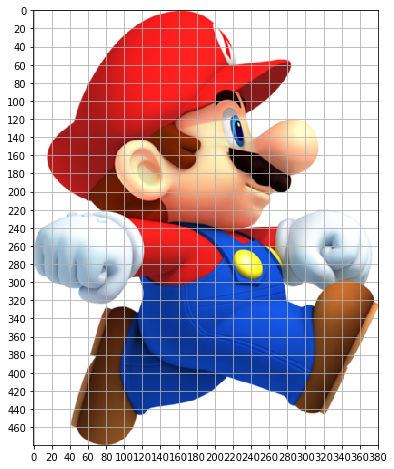

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(mario)
plt.xticks(range(0,400,20))
plt.yticks(range(0,480,20))
plt.grid(True, 'both')

# Fill this out

In [28]:
hat = mario[60:80,180:200]
dark_hat = mario[80:90, 240:250]
# have kids fill some of this
hair = mario[200:220,80:100]
shoe = mario[440:460, 80:100]
armpit = mario[280:300, 140:160]
right_arm = mario[240:260, 140:160]
left_arm = mario[240:260, 240:260]
dress = mario[340:360, 240:260]
cheek = mario[180:200, 200:220]
white_bg = mario[440:460, 220:240]

theM = mario[40:60,200:220]

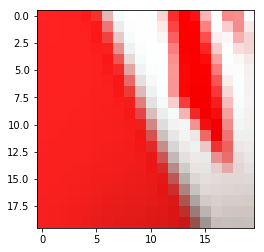

In [29]:
#plot to make sure you actually get the right part
# plt.imshow(hat)
# plt.imshow(dark_hat)
# plt.imshow(hair)
# plt.imshow(shoe)
# plt.imshow(armpit)
# plt.imshow(right_arm)
# plt.imshow(left_arm)
# plt.imshow(dress)
# plt.imshow(cheek)
# plt.imshow(white_bg)

plt.imshow(theM)

In [30]:
# define signal(red cloth/hat) and background(other stuff)
# signal and background is now just an array of shape (npixel, 3)
# this will make you life simpler when you analyze stuff
# print the shape to see what it looks like
def flat(p):
    return p.reshape(-1, p.shape[-1])

signal = np.concatenate((
    flat(hat),
    flat(dark_hat),
    flat(armpit),
    flat(right_arm),
    flat(left_arm),
    
    flat(theM)
))[:, :3] # remove the alpha channel
background = np.concatenate((
    flat(hair),
    flat(shoe),
    flat(dress),
    flat(cheek),
    flat(white_bg)
))[:, :3] # remove the alpha channel
print("background ", background.shape)
print("signal", signal.shape)

background  (2000, 3)
signal (2100, 3)


5.1.2) Let's make some histogram of how R values differ between his red cloth and the rest.

Once you are done make a plot of B and G as well. I want you to make the following graph. Showing the difference in distribution of R value for signal and background.

![rgb_hist](rgb_hist.png)

Look for: `plt.subplots` and `plt.hist` and figure out what `signal[:,2]` does.

Text(0.5,1,'blue')

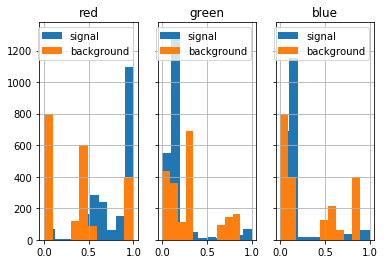

In [31]:
f,arr = plt.subplots(1,3,sharey=True)

arr[0].hist(signal[:,0], label = "signal")
arr[0].hist(background[:,0],label = "background")
arr[0].grid()
arr[0].legend()
arr[0].set_title("red")

arr[1].hist(signal[:,1], label = "signal")
arr[1].hist(background[:,1],label = "background")
arr[1].grid()
arr[1].legend()
arr[1].set_title("green")

arr[2].hist(signal[:,2], label = "signal")
arr[2].hist(background[:,2],label = "background")
arr[2].grid()
arr[2].legend()
arr[2].set_title("blue")


5.1.3) From the graph you made, which color is a good choice for separting his red hat/cloth from the rest? You may be surprised.

In [32]:
##I don't know  blue maybe?

5.1.4) We can do better than 1d plot. We can do 2d scatter plot. Make the following plot which show how 2-d distribution of each feature pair (eg: (R,B)) differs between signal and the background.
![rgb_scatter](rgb_scatter.png)

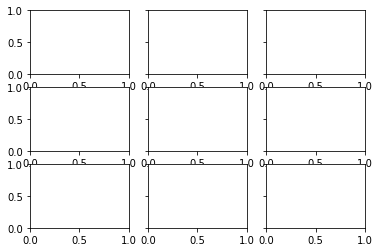

In [33]:
f,arr = plt.subplots(3,3,sharey=True)



### What we learned so far.


We learned a lot by making the right kind of visualization. We can see clearly that the signal shown in red is clearly seperated from the background(blue). We could in principle end it here by drawing a straight line on (R-G) space which seperate the two. Finding that equation and figure out how to calculate if a point is on the right or on the left of the line. You would even learn a more sophisticated method in Pattern Recognition on how to teach computer to seperate the two groups. But, we will not do it here. 

### Better Color Space

We will make the problem much much easier by using the "right" kind of color space which are different kind of representing color. Some popular ones are(google up if you are interested)
  - RGB which we were using. This representation of color makes sense for computer screen and such since it use red green and blue pixel to represent color
  - CYMK. Ever notice that printer ink are actually not Red Green Blue? They are Cyan, Yellow, Magenta, and blacK? this is used primarily for printing purposes. Printing Graphic Designer goes through a great ordeal to match their screen color(in RGB) with one they will see in printing(CMYK).
  - HSV or HSL. Hue Saturation and Value/Lightness. The is what we are going to be using. It seperate the color(Hue), Saturation and Value. https://en.wikipedia.org/wiki/HSL_and_HSV. This color space closely match on how human perceive color. Typically, it's the right choice when doing image analysis.
  
<img src="HSV_color_solid_cylinder.png" style="height:200px;"/>

5.1.3) **Convert signal and background to hsv.** For this task conver signal array and background array to hsv instead of hsv.
Luckily we do not have to implement the conversion between RGB and HSV since matplotlib already has it for it. See `matplotlib.colors.rgb_to_hsv` and `matplotlib.colors.hsv_to_rgb`.

The answer should be one line each for signal_hsv and background_hsv. Read up the manual

In [34]:
import matplotlib 
signal_hsv = matplotlib.colors.rgb_to_hsv(signal)
background_hsv = matplotlib.colors.rgb_to_hsv(background)

5.1.4) Let's make the histogram to see how Hue, Saturation, and Value are distributed differently among signal and background.

![hsv_hist](hsv_hist.png)

Text(0.5,1,'value')

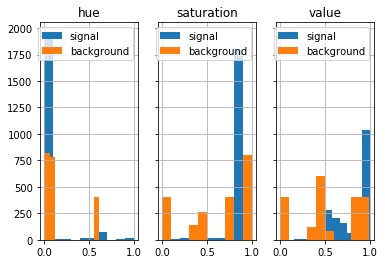

In [35]:
f,arr = plt.subplots(1,3,sharey=True)

arr[0].hist(signal_hsv[:,0], label = "signal")
arr[0].hist(background_hsv[:,0],label = "background")
arr[0].grid()
arr[0].legend()
arr[0].set_title("hue")

arr[1].hist(signal_hsv[:,1], label = "signal")
arr[1].hist(background_hsv[:,1],label = "background")
arr[1].grid()
arr[1].legend()
arr[1].set_title("saturation")

arr[2].hist(signal_hsv[:,2], label = "signal")
arr[2].hist(background_hsv[:,2],label = "background")
arr[2].grid()
arr[2].legend()
arr[2].set_title("value")

5.1.5) While we are at it let's make a 2-D scatter plot. Like this one
![hsv_scatter](hsv_scatter.png)

5.1.6) There is one technical difficulty. You may notice some points at $h=1.0$. 

The hue value is essentially the angle so it wraps around. This means that 0 is actully close to 1.

<img src="HSV_color_solid_cylinder.png" style="width:200px"/>

Your job for this one is to write a function called `hue_distance(h1, h2)` to calculate how far the two hues are given the fact that it wraps around.

Do not think too much it's just one `if`.

 - `hue_distance(1.0,0.0) == 0.0`
 - `hue_distance(0.0,0.2) == 0.0`
 - `hue_distance(0.5,0.2) == 0.3`

In [36]:
def hue_distance(h1, h2):
    dis = h1 - h2
    if(dis >=1 or dis <=0):
        return 0.0
    else:
        return dis

5.1.7) Use what you learned from HSV plots and find write a code that seperate the red hat/cloth and the rest. Zoom in the plots you made if needed. If there are regions that doesn't work as you expect add it to the sample and modify your condition rinse and repeat.

With the two plots I managed to get this
<img src="mask.png"/>

In [37]:
red_part = np.zeros(mario.shape)
# print(mario[10,20][:3])
# yeah=matplotlib.colors.rgb_to_hsv(mario[10,20][:3])
# print(yeah)
ny = red_part.shape[0]
nx = red_part.shape[1]
for iy in range(1, ny-1):
    for ix in range(1, nx-1):
        pixel = matplotlib.colors.rgb_to_hsv(mario[iy,ix][:3])
        h = pixel[0]
        s = pixel[1]
        v = pixel[2]
        if((0.0<=h and h<0.03) and (0.8<=s and s<=1) and (0.4<=v and v<=1.0) ):
            red_part[iy,ix] = np.array([0,1,0,1])
        else: 
            red_part[iy,ix] = np.array([50,50,50,1])
        

(480, 381, 4)


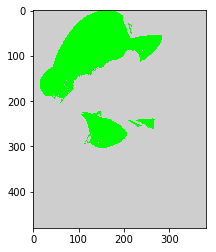

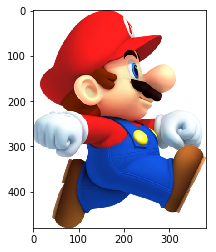

In [38]:
print(red_part.shape)
plt.imshow(red_part)
plt.figure()
plt.imshow(mario)

### 5.2) Changing Color Without Chaning The Shade

Now that we can detect Mario's cloth. All we need to do now is to change the color of his cloth to "green" ish. This means that all we need to do is to change the hue value from red hue to green hue.

The hue value can be found below. Make sure you divide it by 360 to get it to 0-1 range that matplotlib expect.

<img src="YOBFy.png" style="height:50px"/>

***Your task*** Make `luigi.png`

<img src="luigi.png" style="height:100px"/>

Hint:
  - You will want to convert hsv back to rgb and pad the original alpha backin so you can display it nicely with `imshow`
  - `matplotlib.colors.hsv_to_rgb` is handy.
  - you can copy nparray with `nparray.copy()`
  - if you want a darker shade scale `value` component down a little bit.




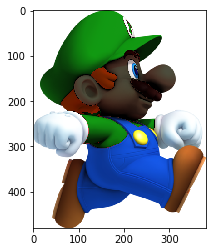

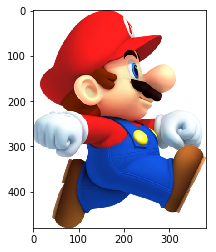

In [40]:
hsv_green = 120/360.
mario = plt.imread('mario.png')
luigi = plt.imread('mario.png')
ny = red_part.shape[0]
nx = red_part.shape[1]
for iy in range(1, ny-1):
    for ix in range(1, nx-1):
        pixel_hsv = matplotlib.colors.rgb_to_hsv(mario[iy,ix][:3])
        h = pixel_hsv[0]
        s = pixel_hsv[1]
        v = pixel_hsv[2]
        if((h<0.03 or 0.9<=h) and (0.8<=s and s<=1) and (0.4<=v and v<=1.0) ):
            pixel_hsv[0] += hsv_green
            if pixel_hsv[0] > 1:
                pixel_hsv[0]-=1
            pixel_hsv[2] -= 0.4
            
            pixel_rgb = matplotlib.colors.hsv_to_rgb(pixel_hsv)

            pixel_rgb = np.append(pixel_rgb,mario[iy][ix][3])
            
            luigi[iy][ix] = pixel_rgb
        if iy < 260:
            if pixel_hsv[0] < 0.2 and 0.15 < pixel_hsv[1] < 0.8 and 0.3 < pixel_hsv[2]:
                    pixel_hsv[2] -= 0.7
                    if(pixel_hsv[2] < 0 ):
                        pixel_hsv[2] = 0
                    pixel_rgb = matplotlib.colors.hsv_to_rgb(pixel_hsv)

                    pixel_rgb = np.append(pixel_rgb,mario[iy][ix][3])
            
                    luigi[iy][ix] = pixel_rgb
                
                
            
plt.imshow(luigi)
plt.figure()
plt.imshow(mario)